# Proyek Sistem Rekomendasi Game

Proyek yang digunakan kali ini adalah Sistem Rekomendasi pada Game Steam. Proyek ini bertujuan untuk memberikan rekomendasi game kepada suatu pengguna.

Dataset yang diambil adalah: https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings

# Masukin Dataset

In [48]:
# Remove the existing folder if it exists
!rm -rf video-game-reviews-and-ratings
# Download the dataset using the Kaggle API
!kaggle datasets download -d jahnavipaliwal/video-game-reviews-and-ratings
# Extract the downloaded zip file
!unzip video-game-reviews-and-ratings.zip -d video-game-reviews-and-ratings

Dataset URL: https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings
License(s): apache-2.0
video-game-reviews-and-ratings.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  video-game-reviews-and-ratings.zip
  inflating: video-game-reviews-and-ratings/video_game_reviews.csv  


# Analisis Game

File yang diperoleh dari dataset ini adalah video games review.csv dengan jumlah data game adalah 47774

In [49]:
# Impor Library yang dibutuhkan untuk disajikan dalam tabel
import pandas as pd
# Buatlah definisi dari masing-masing csv
games = pd.read_csv('/content/video-game-reviews-and-ratings/video_game_reviews.csv')
# Tunjukkan hasil jumlah data game, data rekomendasi, dan data user
print('Jumlah data games: ', len(games))

Jumlah data games:  47774


In [3]:
# Sekarang tunjukkan tabel pada file game
games

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47769,Minecraft,41.6,All Ages,49.11,PlayStation,Yes,Valve,Innersloth,2016,Party,No,56.7,Low,Excellent,Average,"Amazing game, but the graphics could be better.",Online,4
47770,The Legend of Zelda: Breath of the Wild,24.2,Kids,31.69,Xbox,Yes,Valve,Electronic Arts,2023,Strategy,No,29.7,High,Good,Excellent,"Solid game, but the graphics could be better.",Offline,1
47771,Animal Crossing: New Horizons,26.7,All Ages,44.90,PlayStation,Yes,Game Freak,Square Enix,2018,Sports,No,8.2,Low,Poor,Good,"Great game, but the gameplay is amazing.",Offline,5
47772,The Legend of Zelda: Breath of the Wild,22.5,Kids,29.99,Xbox,Yes,Epic Games,Epic Games,2018,Simulation,Yes,29.7,High,Poor,Excellent,"Disappointing game, but the graphics could be ...",Offline,1


In [4]:
# Berikan info kolom dan jumlah data pada game
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

Berikut ini adalah penjelasan informasi dari data video game ini:

1. Game Title: Nama game.

2. User Rating: Rating yang diberikan oleh pengguna, dalam format float.

3. Age Group Targeted: Kelompok usia yang menjadi target game.

4. Price: Harga game, dalam format float.

5. Platform: Platform tempat game tersedia (misalnya, PC, PlayStation, Xbox).

6. Requires Special Device: Apakah game memerlukan perangkat khusus (misalnya, VR headset).

7. Developer: Pengembang game.

8. Publisher: Penerbit game.

9. Release Year: Tahun rilis game.

10. Genre: Genre atau kategori game (misalnya, Action, Adventure, RPG).

11. Multiplayer: Apakah game mendukung mode multiplayer.

12. Game Length (Hours): Durasi permainan dalam jam.

13. Graphics Quality: Kualitas grafis game.

14. Soundtrack Quality: Kualitas soundtrack game.

15. Story Quality: Kualitas cerita game.

16. User Review Text: Teks ulasan dari pengguna.

17. Game Mode: Mode permainan (misalnya, Single Player, Multiplayer).

18. Min Number of Players: Jumlah minimum pemain yang diperlukan untuk memainkan game.

In [5]:
# Cek apakah datanya duplikat atau tidak
games.duplicated().sum()

0

Sepertinya tidak ada data yang kosong dan aman untuk dianalisis.

In [6]:
# Menunjukkan Jumlah game dan judul game
print('Jumlah Game: ', len(games['Game Title'].unique()))
print('Judul Game: ', games['Game Title'].unique())

Jumlah Game:  40
Judul Game:  ['Grand Theft Auto V' 'The Sims 4' 'Minecraft' 'Bioshock Infinite'
 'Half-Life: Alyx' 'Sid Meier’s Civilization VI' 'Just Dance 2024'
 '1000-Piece Puzzle' 'Spelunky 2' 'Street Fighter V' 'Fall Guys'
 'Rocket League' 'The Elder Scrolls V: Skyrim' 'Among Us' 'Stardew Valley'
 'Call of Duty: Modern Warfare 2'
 'The Legend of Zelda: Breath of the Wild' 'Tekken 7'
 'Pillars of Eternity II: Deadfire' 'Animal Crossing: New Horizons'
 'Hades' 'Mario Kart 8 Deluxe' 'Overwatch 2' 'Fortnite'
 'Pokémon Scarlet & Violet' 'Hitman 3' 'Tomb Raider (2013)'
 'Halo Infinite' 'Super Smash Bros. Ultimate' 'Kingdom Hearts III'
 'League of Legends' 'The Witcher 3: Wild Hunt' 'FIFA 24'
 'Ghost of Tsushima' 'Cuphead' 'Red Dead Redemption 2' 'Portal 2' 'Tetris'
 'Counter-Strike: Global Offensive' 'Super Mario Odyssey']


In [7]:
# Menunjukkan Harga game dan rating user game
print('Jumlah User Rating: ', len(games['User Rating'].unique()))
print('User Rating: ', games['User Rating'].unique())

Jumlah User Rating:  392
User Rating:  [36.4 38.3 26.8 38.4 30.1 38.6 33.1 32.3 26.7 23.9 29.3 37.4 28.2 43.
 17.6 28.6 32.4 18.7 29.7 36.5 30.7 26.3 31.4 26.2 27.7 35.8 37.3 43.1
 31.8 35.3 31.6 32.7 29.5 28.7 30.2 33.  22.3 18.9 31.1 34.1 33.5 32.5
 39.8 30.6 39.2 29.9 27.5 34.8 44.3 28.8 19.1 14.4 30.8 28.9 39.5 39.7
 29.6 23.3 36.6 34.7 41.  29.1 32.  33.9 37.5 22.5 24.6 25.  31.9 25.1
 35.7 44.1 32.6 33.2 17.1 28.4 20.2 21.4 46.1 40.5 13.9 20.9 20.8 22.2
 18.5 25.3 38.5 34.9 23.1 22.6 36.3 37.7 36.7 26.6 46.  20.7 25.2 21.6
 44.4 15.7 22.8 18.6 44.5 24.9 24.4 36.9 36.  11.3 33.4 30.  19.6 41.7
 46.3 23.6 25.5 15.6 37.1 31.3 29.2 23.7 19.4 28.1 13.2 16.3 30.5 40.
 48.1 23.8 25.7 34.4 34.  25.9 21.2 27.6 18.3 33.7 20.5 34.3 34.5 36.1
 37.6 18.  17.2 26.4 28.3 27.2 32.1 32.9 45.1 26.1 39.  33.6 37.  32.2
 35.2 18.2 31.7 23.  28.  38.9 38.8 27.8 24.3 26.9 22.9 41.3 30.4 21.3
 32.8 11.8 19.9 19.8 33.3 29.4 24.8 44.  38.7 23.5 17.8 35.  42.7 36.2
 13.8 43.7 40.3 25.6 30.9 41.1 38.2 22.1

Data yang dtunjukkan adalah data user review dari angka 1 sampai 50 dimana angka 50 adalah angka tertinggi dalam user review.

In [8]:
# Menunjukkan Harga game dan rating user game
print('Jumlah Harga Game: ', len(games['Price'].unique()))
print('Harga Game: ', games['Price'].unique())

Jumlah Harga Game:  4001
Harga Game:  [41.41 57.56 44.93 ... 56.9  48.93 28.91]


Code di atas adalah isi dari harga game dalam Dollar.

In [51]:
# Buatlah definisi untuk mencari game yang diinginkan.
def search_game(game_title):
    """
    Mencari game di DataFrame 'games' berdasarkan judulnya.

    Argumen:
        judul_game: Judul game yang akan dicari.

    Mengembalikan:
        DataFrame pandas yang berisi game yang cocok, atau None jika tidak ditemukan kecocokan.
    """
    matching_games = games[games['Game Title'].str.contains(game_title, case=False, na=False)]
    if not matching_games.empty:
        return matching_games
    else:
        return None


# Contoh Search Game
search_term = "Spelunky 2"  # Kamu bisa menggantikan pencarian game sesuai yang kamu mau.
results = search_game(search_term)

# Cek hasilnya jika ketemu atau tidak
if results is not None:
    print(f"Search Results for '{search_term}':")
    print(results)
else:
    print(f"No games found with the title '{search_term}'.")

Search Results for 'Spelunky 2':
       Game Title  User Rating Age Group Targeted  Price         Platform  \
10     Spelunky 2         29.3             Adults  27.76           Mobile   
20     Spelunky 2         30.7           All Ages  45.94               PC   
37     Spelunky 2         36.4             Adults  35.69      PlayStation   
49     Spelunky 2         32.7              Teens  48.32           Mobile   
121    Spelunky 2         23.3               Kids  25.50      PlayStation   
...           ...          ...                ...    ...              ...   
47668  Spelunky 2         44.0              Teens  53.69               PC   
47688  Spelunky 2         34.5             Adults  55.17  Nintendo Switch   
47715  Spelunky 2         14.1             Adults  27.60             Xbox   
47732  Spelunky 2         20.6           All Ages  32.60               PC   
47759  Spelunky 2         18.2               Kids  31.08  Nintendo Switch   

      Requires Special Device       Develo

Karena data ini sangat banyak dan bisa menyebabkan crash untuk dianalisis, maka data ini harus difilter sampai 5000 data.

# Analisis Univariat

Sekarang data ini akan dianalisis secara univariat terlebih dahulu

In [12]:
# Deskripsi Game
games.describe()

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,2016.480952,32.481672,5.116758
std,7.550131,11.520342,4.027276,15.872508,2.769521
min,10.100000,19.990000,2010.000000,5.000000,1.000000
25%,24.300000,29.990000,2013.000000,18.800000,3.000000
50%,29.700000,39.845000,2016.000000,32.500000,5.000000
75%,35.100000,49.957500,2020.000000,46.300000,7.000000
max,49.500000,59.990000,2023.000000,60.000000,10.000000


In [54]:
# Impor library yang dibutuhkan untuk Analisis Uunivariat
import matplotlib.pyplot as plt
import seaborn as sns

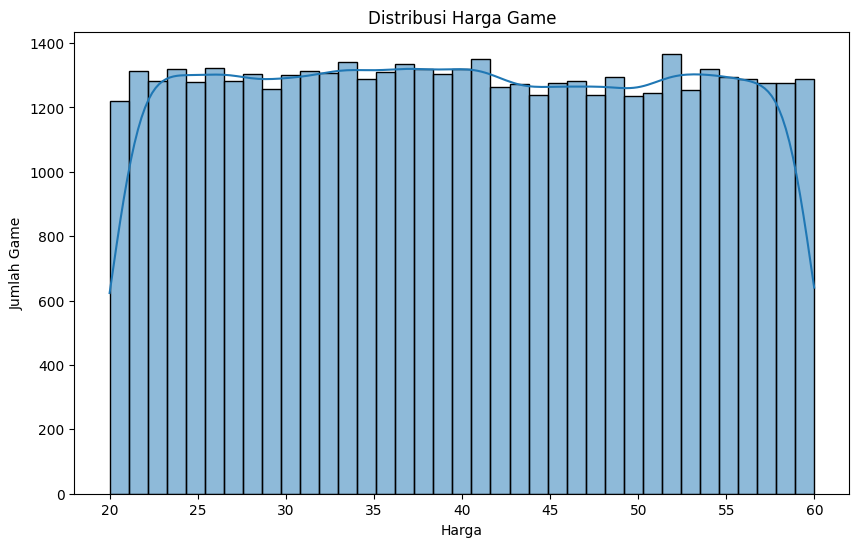

In [53]:
# Distribusi Harga Game
plt.figure(figsize=(10, 6))
sns.histplot(games['Price'], kde=True)
plt.title('Distribusi Harga Game')
plt.xlabel('Harga')
plt.ylabel('Jumlah Game')
plt.show()

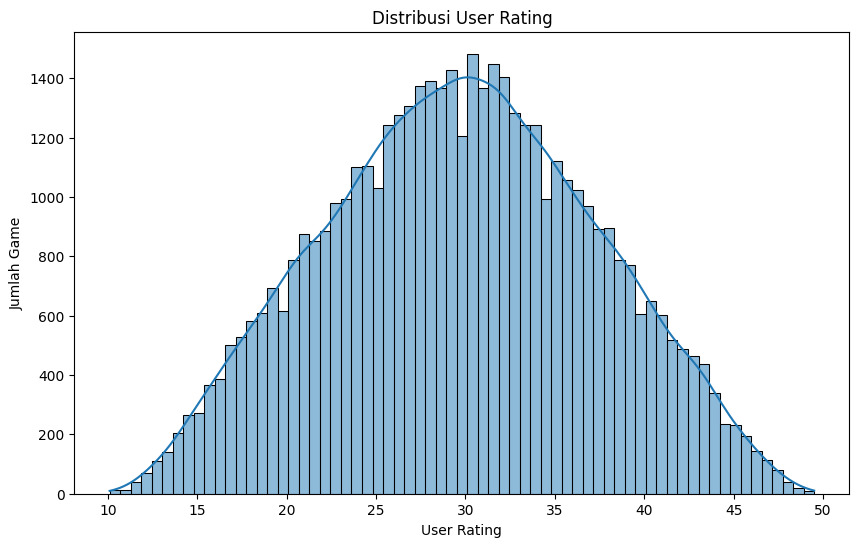

In [14]:
# Analisis Univariat User Rating
plt.figure(figsize=(10, 6))
sns.histplot(games['User Rating'], kde=True)
plt.title('Distribusi User Rating')
plt.xlabel('User Rating')
plt.ylabel('Jumlah Game')
plt.show()

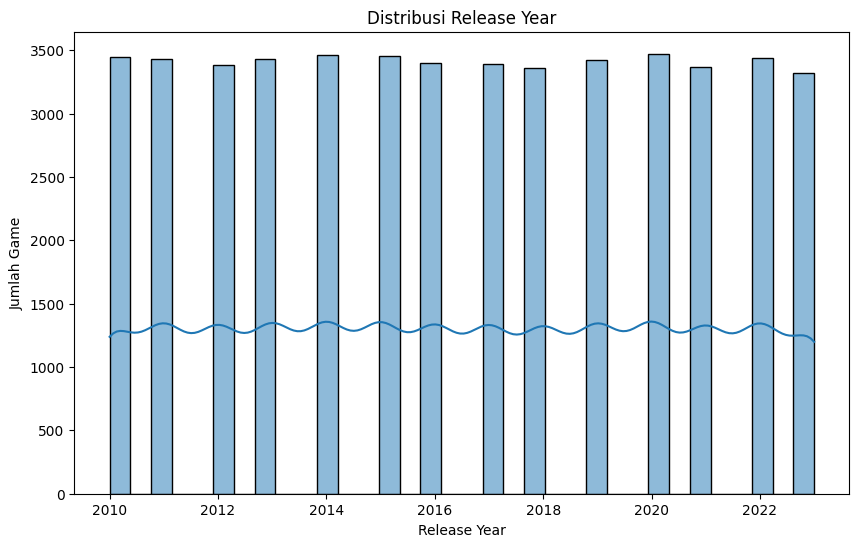

In [55]:
# Analisis Univariat Tahun Rilis
plt.figure(figsize=(10, 6))
sns.histplot(games['Release Year'], kde=True)
plt.title('Distribusi Release Year')
plt.xlabel('Release Year')
plt.ylabel('Jumlah Game')
plt.show()

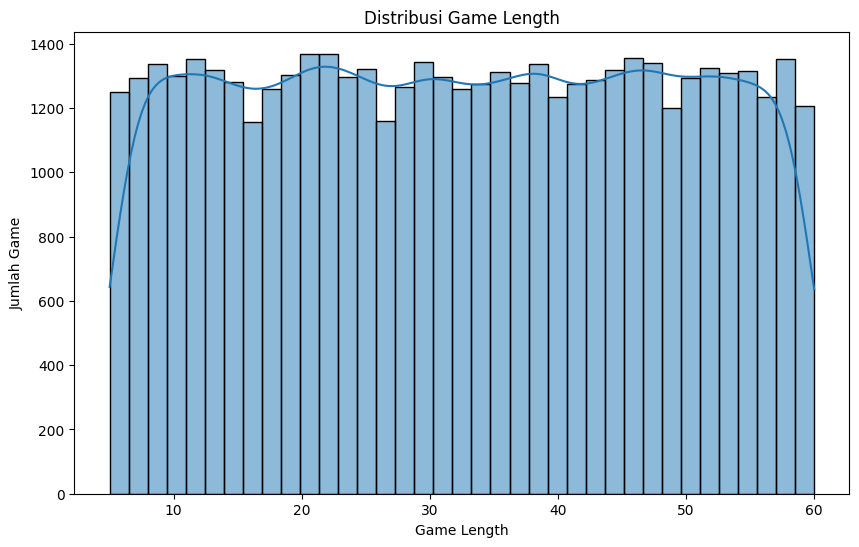

In [56]:
# Analisis Univariat Durasi Game dalam Jam
plt.figure(figsize=(10, 6))
sns.histplot(games['Game Length (Hours)'], kde=True)
plt.title('Distribusi Game Length')
plt.xlabel('Game Length')
plt.ylabel('Jumlah Game')
plt.show()

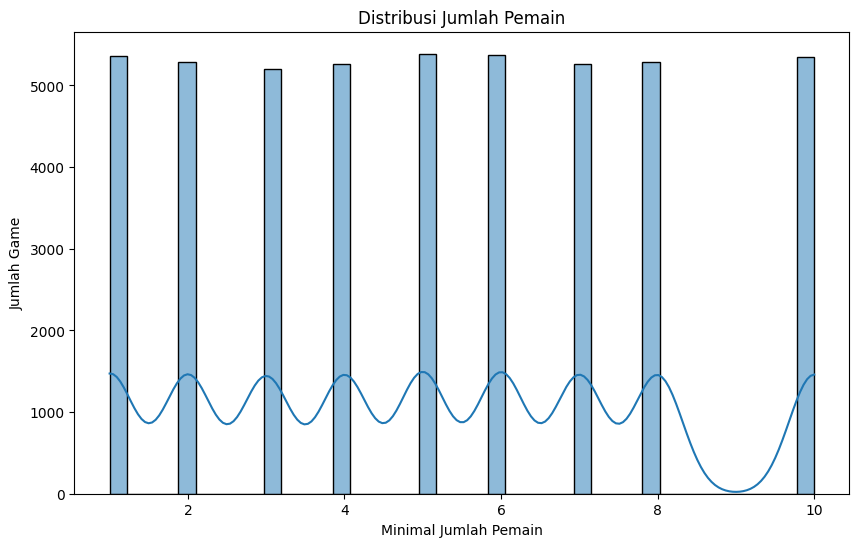

In [57]:
# Analisis Univariat Jumlah Pemain
plt.figure(figsize=(10, 6))
sns.histplot(games['Min Number of Players'], kde=True)
plt.title('Distribusi Jumlah Pemain')
plt.xlabel('Minimal Jumlah Pemain')
plt.ylabel('Jumlah Game')
plt.show()

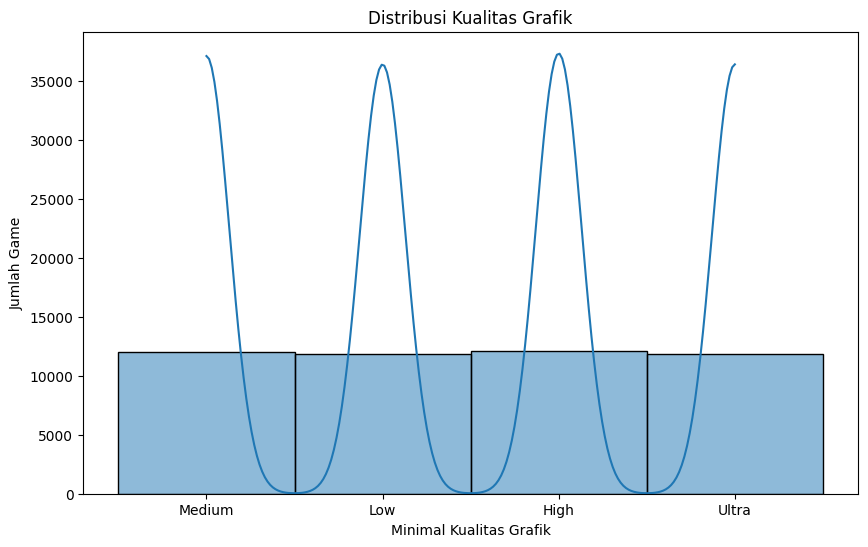

In [19]:
# Analisis Univariat Kualitas Grafik
plt.figure(figsize=(10, 6))
sns.histplot(games['Graphics Quality'], kde=True)
plt.title('Distribusi Kualitas Grafik')
plt.xlabel('Minimal Kualitas Grafik')
plt.ylabel('Jumlah Game')
plt.show()

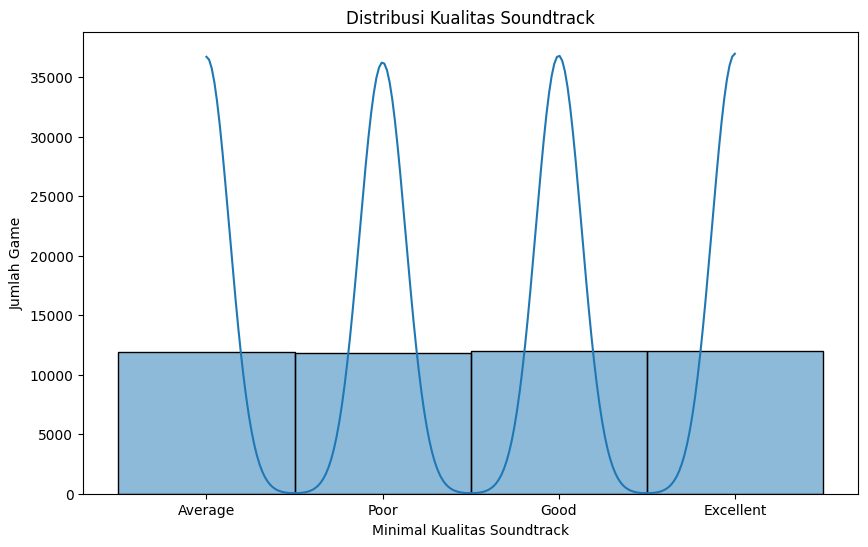

In [20]:
# Analisis Univariat Kualitas Soundtrack
plt.figure(figsize=(10, 6))
sns.histplot(games['Soundtrack Quality'], kde=True)
plt.title('Distribusi Kualitas Soundtrack')
plt.xlabel('Minimal Kualitas Soundtrack')
plt.ylabel('Jumlah Game')
plt.show()

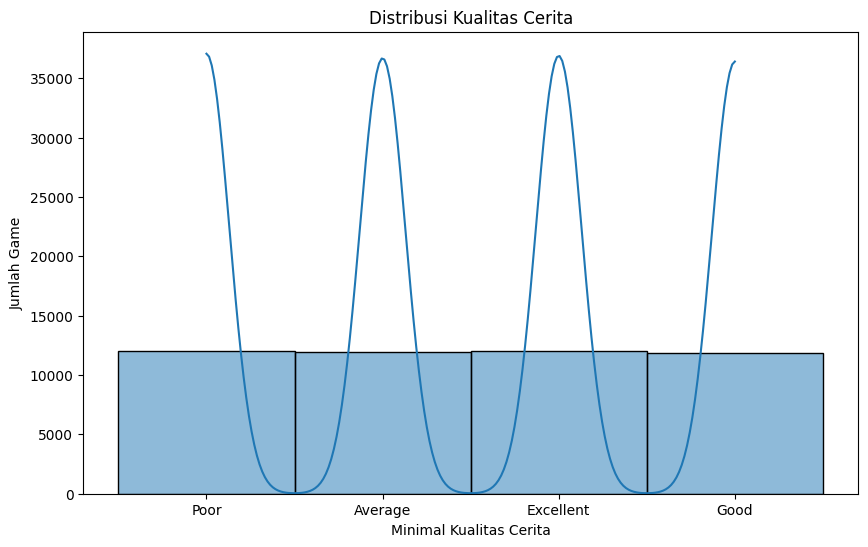

In [21]:
# Analisis Univariat Kualitas Cerita
plt.figure(figsize=(10, 6))
sns.histplot(games['Story Quality'], kde=True)
plt.title('Distribusi Kualitas Cerita')
plt.xlabel('Minimal Kualitas Cerita')
plt.ylabel('Jumlah Game')
plt.show()

Sekarang kita tentukan Top 10 Genre dengan parameter game terbanyak dari user.

Top 10 Genres:
Genre
RPG           4873
Shooter       4869
Strategy      4867
Puzzle        4822
Simulation    4784
Adventure     4750
Party         4748
Sports        4735
Fighting      4687
Action        4639
Name: count, dtype: int64


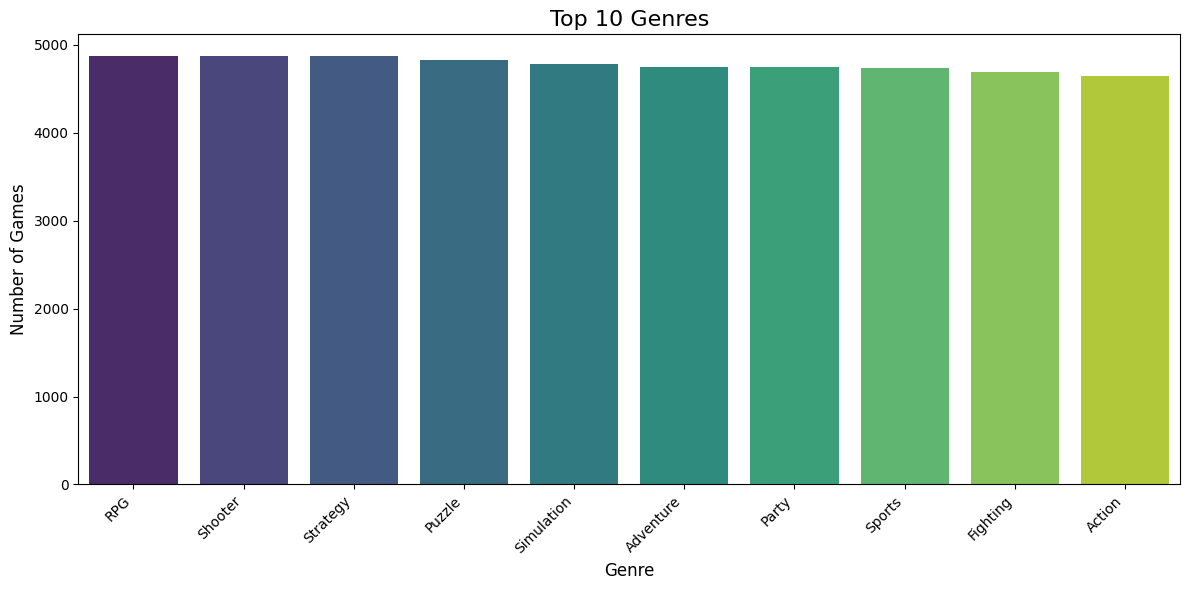

In [22]:
# Perhitungan Top 10 Genre dalam Game
top_10_genres = games['Genre'].value_counts().head(10)

# Cetak Top 10 Genre
print("Top 10 Genres:")
print(top_10_genres)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, hue=top_10_genres.index, dodge=False, palette="viridis", legend=False)
plt.title('Top 10 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Analisis Multivariat

Setelah Analisis Univariat divisualisasikan, sekarang Analisis Multivariat yang terdiri dari dua data yang diukur secara bersamaan.

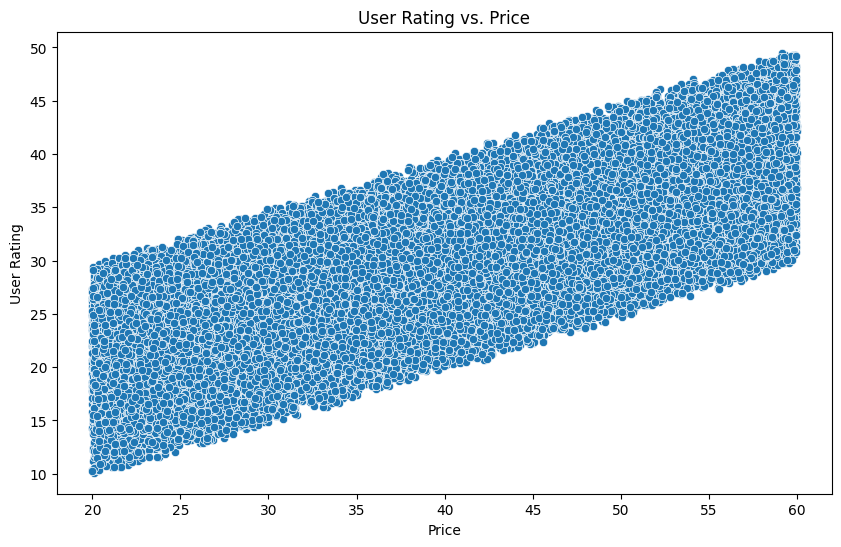

In [23]:
# Hubungan antara User Rating dan Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='User Rating', data=games)
plt.title('User Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.show()

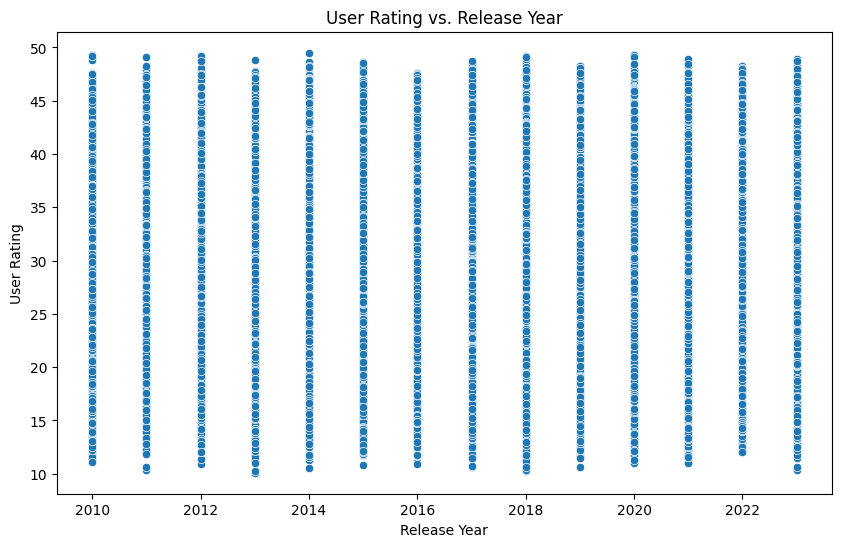

In [24]:
# Hubungan antara User Rating dan Release Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Release Year', y='User Rating', data=games)
plt.title('User Rating vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.show()

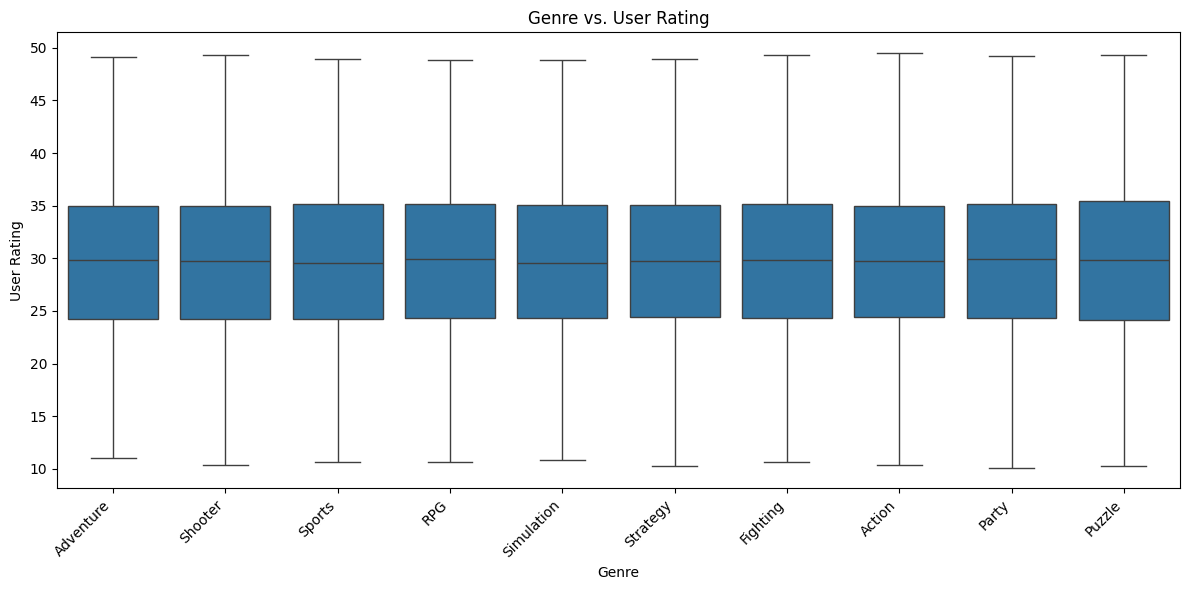

In [58]:
# Hubungan Genre dengan User Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='User Rating', data=games)
plt.title('Genre vs. User Rating')
plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.xticks(rotation=45, ha='right') # Rotasikan label x-axis biar bisa dibaca
plt.tight_layout()
plt.show()

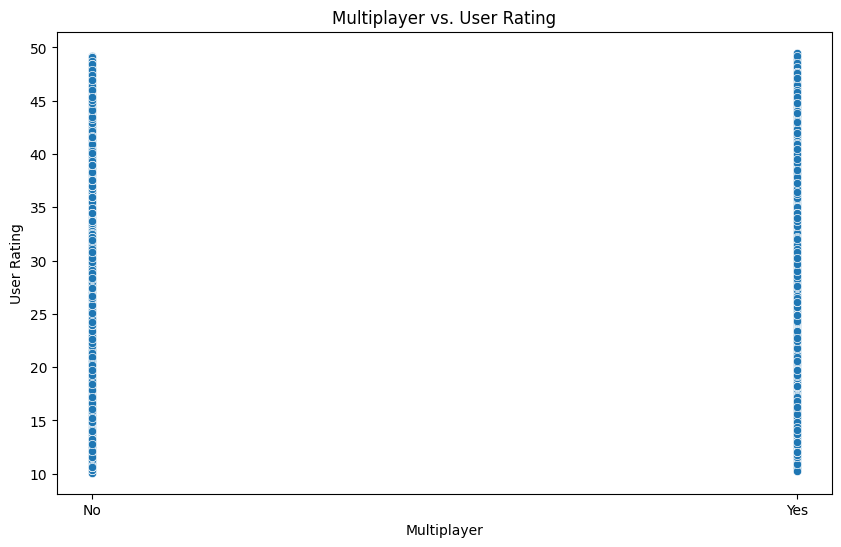

In [60]:
# Analisis Multivariat: Multiplayer vs. User Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Multiplayer', y='User Rating', data=games)
plt.title('Multiplayer vs. User Rating')
plt.xlabel('Multiplayer')
plt.ylabel('User Rating')
plt.show()

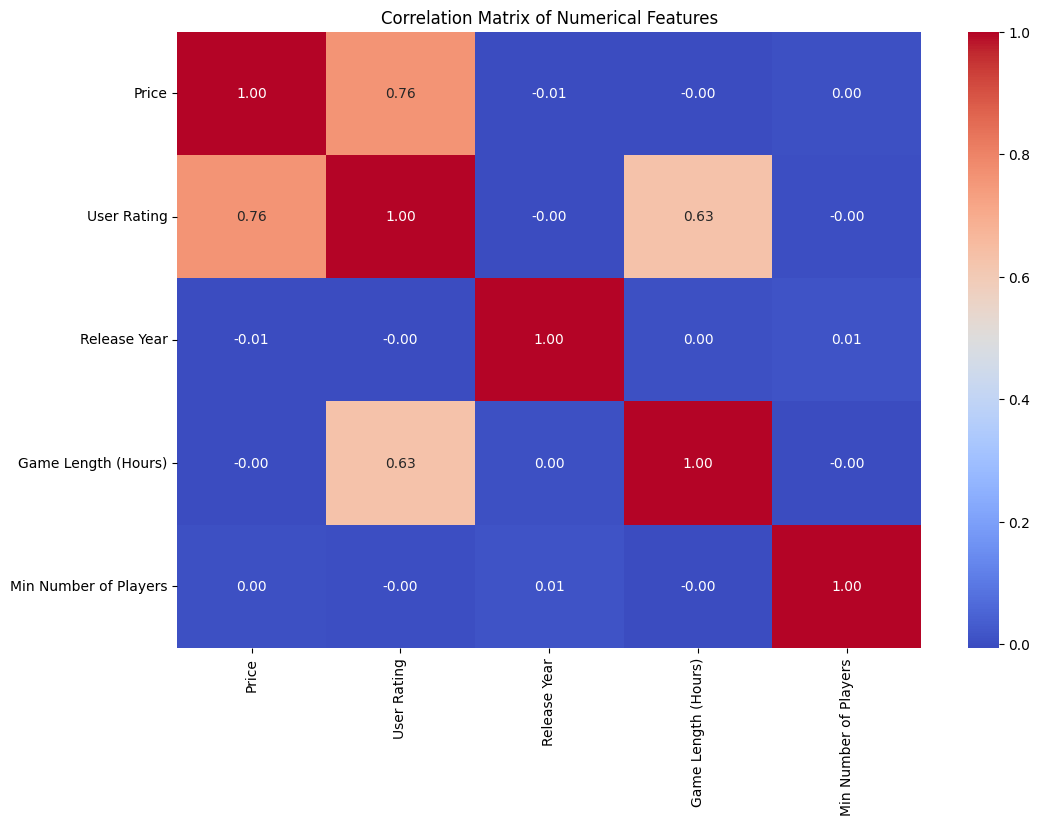

In [62]:
# Correlation Matrix
correlation_matrix = games[['Price', 'User Rating', 'Release Year', 'Game Length (Hours)', 'Min Number of Players']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Persiapan Data


Tujuan utama dari tahap persiapan data adalah untuk mengubah data mentah menjadi format yang sesuai dan optimal untuk diproses oleh model machine learning. Pada proyek ini, data yang ada perlu diolah agar dapat digunakan untuk membangun sistem rekomendasi Content-Based Filtering dan Collaborative Filtering.

In [28]:
# Mengecek missing value pada dataframe games
games.isnull().sum()

,0
Game Title,0
User Rating,0
Age Group Targeted,0
Price,0
Platform,0
Requires Special Device,0
Developer,0
Publisher,0
Release Year,0
Genre,0


In [29]:
# This example sorts games by 'User Rating' in descending order.
sorted_games = games.sort_values(by='User Rating', ascending=False)

sorted_games = sorted_games.reset_index(drop=True)  # Reset index
sorted_games

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Just Dance 2024,49.5,All Ages,59.17,PlayStation,No,EA Sports,Activision,2014,Action,Yes,59.7,Low,Good,Average,"Disappointing game, but the gameplay is amazing.",Offline,3
1,Street Fighter V,49.3,Kids,59.34,PC,Yes,Rockstar Games,Square Enix,2020,Puzzle,Yes,59.0,Low,Average,Poor,"Solid game, but too many bugs.",Online,1
2,Hades,49.3,Teens,59.76,PlayStation,Yes,CD Projekt Red,Nintendo,2020,Shooter,Yes,59.4,Low,Good,Excellent,"Solid game, but the graphics could be better.",Offline,7
3,Kingdom Hearts III,49.3,Kids,59.87,Xbox,Yes,Rockstar Games,Electronic Arts,2010,Fighting,Yes,59.2,Ultra,Excellent,Excellent,"Disappointing game, but too many bugs.",Offline,4
4,Counter-Strike: Global Offensive,49.2,Teens,59.98,PC,Yes,CD Projekt Red,Activision,2010,Party,Yes,58.6,Low,Average,Excellent,"Disappointing game, but too many bugs.",Offline,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47769,Pillars of Eternity II: Deadfire,10.4,Adults,20.01,PlayStation,No,Capcom,Capcom,2023,Shooter,No,7.2,Low,Average,Good,"Disappointing game, but the graphics could be ...",Offline,2
47770,Tetris,10.4,Teens,20.27,Nintendo Switch,Yes,Nintendo,Epic Games,2011,Puzzle,No,5.7,Low,Average,Poor,"Disappointing game, but too many bugs.",Online,6
47771,The Legend of Zelda: Breath of the Wild,10.3,Teens,20.29,PC,Yes,Game Freak,Square Enix,2018,Puzzle,No,5.7,Ultra,Good,Good,"Solid game, but the gameplay is amazing.",Online,4
47772,Tekken 7,10.3,Teens,20.01,Xbox,No,Valve,Square Enix,2013,Strategy,Yes,6.7,Medium,Good,Excellent,"Amazing game, but the graphics could be better.",Online,3


In [30]:
len(sorted_games)

47774

In [31]:
# prompt: Buat persiapan data pakai minmaxscaler

from sklearn.preprocessing import MinMaxScaler

# Select numerical features for scaling (replace with your actual features)
numerical_features = ['Price', 'User Rating', 'Release Year', 'Game Length (Hours)', 'Min Number of Players']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
sorted_games[numerical_features] = scaler.fit_transform(sorted_games[numerical_features])

# Now the selected numerical features in the 'games' DataFrame are scaled between 0 and 1
print(sorted_games.head())

                         Game Title  User Rating Age Group Targeted    Price  \
0                   Just Dance 2024     1.000000           All Ages  0.97950   
1                  Street Fighter V     0.994924               Kids  0.98375   
2                             Hades     0.994924              Teens  0.99425   
3                Kingdom Hearts III     0.994924               Kids  0.99700   
4  Counter-Strike: Global Offensive     0.992386              Teens  0.99975   

      Platform Requires Special Device       Developer        Publisher  \
0  PlayStation                      No       EA Sports       Activision   
1           PC                     Yes  Rockstar Games      Square Enix   
2  PlayStation                     Yes  CD Projekt Red         Nintendo   
3         Xbox                     Yes  Rockstar Games  Electronic Arts   
4           PC                     Yes  CD Projekt Red       Activision   

   Release Year     Genre Multiplayer  Game Length (Hours) Graphics 

Semua data telah diperbaiki dan siap untuk dilatih 2 model karena hanya ada satu dokumen dalam file csv.

# Model Content Based Filtering

Content-Based Filtering adalah metode dalam sistem rekomendasi yang merekomendasikan item yang sebanding dengan yang disukai pengguna sebelumnya. Model ini menganalisis konten item (seperti genre game,judul game, platform,  pengembang game, dsb) untuk menemukan item yang sesuai dengan preferensi pengguna.

Fungsi

Cara kerja Content-Based Filtering adalah sebagai berikut:

1. Analisis Konten: Model ini menganalisis konten setiap item untuk mengekstrak fitur penting. Misalnya, fitur game dapat mencakup genre, platform, developer, dan lainnya.
2. Profil Pengguna: Model ini membuat profil untuk setiap pengguna berdasarkan item yang mereka sukai atau diberi rating tinggi. Preferensi pengguna terhadap fitur-fitur item tersebut diwakili dalam profil ini.
3. Pencocokan: Model ini membandingkan fitur item yang belum pernah mereka lihat dengan profil pengguna. Item dengan fitur yang paling sesuai dengan profil pengguna akan direkomendasikan.

Tujuan

Tujuan utama dari Content-Based Filtering adalah:

1. Personalisasi: Memberikan rekomendasi yang dipersonalisasi untuk setiap pengguna berdasarkan preferensi dan riwayat interaksi mereka dengan item.
2. Penemuan Item: Membantu pengguna menemukan item baru yang mungkin mereka sukai tetapi belum pernah mereka lihat sebelumnya.
3. Peningkatan Kepuasan Pengguna: Meningkatkan kepuasan pengguna dengan memberikan rekomendasi yang relevan dan menarik bagi mereka.

In [63]:
# Impor Scikit-Learn untuk Model Content Based Filtering
!pip install scikit-learn

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Pilih kolom relevan untuk TF-IDF
selected_columns = ['Genre']

# Gabungkan kolom-kolom teks menjadi satu kolom
sorted_games['combined_features'] = sorted_games[selected_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') # Stop words removal for better results

# Fit dan transform fitur kombinasi
tfidf_matrix = vectorizer.fit_transform(sorted_games['combined_features'])

# Sekarang cek ukuran TF-IDF Matrix
print(tfidf_matrix.shape)

(47774, 10)


In [34]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]])

Sebelum masuk ke Cosine Similarity, pastikan filter sampai 10000 data penting agar tidak terjadi crash ketika menjalankan Cosine Similarity

In [65]:
# Filter TF-IDF Matrix menjadi top 10,000 data yang penting
tfidf_sums = tfidf_matrix.sum(axis=1)
# Konversi tfidf_sums ke 1D array untuk hindari IndexError
top_indices = tfidf_sums.A1.argsort()[::-1][:10000]
# Sekarang, TF-IDF Matrix sudah dikonversi menjadi yang diinginkan
filtered_tfidf_matrix = tfidf_matrix[top_indices]
# Cek hasilnya
filtered_tfidf_matrix.shape

(10000, 10)

In [66]:
# Import Library untuk Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada Matrix tf-idf
cosine_sim = cosine_similarity(filtered_tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [67]:
# Ambil Kolom Relevantuntuk melakuakn sortir dan rekomendasi
selected_columns = ['Game Title', 'Genre', 'User Rating', 'Price'] # Add other desired columns

# Sortir User Rating di order descending dan reset index
sorted_games = games.sort_values(by=['User Rating'], ascending=False)
sorted_games = sorted_games.reset_index(drop=True)

# Ambil kolom yang diinginkan untuk sorted_games
sorted_games = sorted_games[selected_columns]

In [68]:
# Fungsi untuk mendapatkan rekomendasi
def game_recommendations(game_title, cosine_sim=cosine_sim, top_n=10):
    # Mendapatkan indeks game yang sesuai dengan judul
    game_index = sorted_games[sorted_games['Game Title'] == game_title].index[0]

    # Mendapatkan skor kesamaan untuk semua game terhadap game input
    similarity_scores = list(enumerate(cosine_sim[game_index]))

    # Mengurutkan game berdasarkan skor kesamaan
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks dari top_n game yang paling mirip (tidak termasuk game input)
    top_indices = [i[0] for i in similarity_scores[1:top_n+1]]

    # Mengembalikan top_n game yang paling mirip dengan genre
    recommendations = sorted_games[['Game Title', 'Genre']].iloc[top_indices]
    return recommendations

# Contoh penggunaan
recommendations = game_recommendations('Grand Theft Auto V')
print(recommendations)

                          Game Title      Genre
10  Counter-Strike: Global Offensive  Adventure
14                Grand Theft Auto V     Action
17                     Rocket League     Action
24                         Fall Guys     Puzzle
32                        Spelunky 2        RPG
49                 1000-Piece Puzzle      Party
55                Tomb Raider (2013)     Action
62                             Hades     Sports
66                          Portal 2      Party
72     Animal Crossing: New Horizons        RPG


Kelebihan:

- Mudah diimplementasi dan dipahami.
- Hanya membutuhkan data dari satu pengguna, tidak seperti Collaborative Filtering.
- Dapat merekomendasikan item niche yang tidak populer di antara pengguna lain.

Kekurangan:

- Rentan terhadap "filter bubble" di mana pengguna hanya direkomendasikan item yang serupa dengan yang mereka sukai sebelumnya.
- Membutuhkan data konten yang kaya dan terstruktur.
- Sulit untuk merekomendasikan item di luar preferensi pengguna yang sudah ada.

# Model Collaborative Filtering

Collaborative Filtering adalah teknik sistem rekomendasi yang memprediksi preferensi pengguna terhadap suatu item berdasarkan rating atau interaksi pengguna lain yang memiliki selera serupa. Model ini mengasumsikan bahwa pengguna yang memiliki preferensi sama di masa lalu cenderung memiliki preferensi sama di masa depan.

Fungsi

Cara kerja Collaborative Filtering adalah sebagai berikut:
1. Pengumpulan Data: Model ini mengumpulkan data rating atau interaksi pengguna terhadap item. Data ini biasanya direpresentasikan dalam bentuk matriks user-item.
2. Identifikasi Tetangga: Model ini mencari pengguna lain (tetangga) yang memiliki preferensi serupa dengan pengguna target.
3. Prediksi Rating: Model ini memprediksi rating pengguna target terhadap item yang belum pernah mereka lihat berdasarkan rating tetangga mereka.
4. Rekomendasi: Model ini merekomendasikan item dengan rating prediksi tertinggi kepada pengguna target.

Ada dua pendekatan utama dalam Collaborative Filtering:

- User-Based: Merekomendasikan item yang disukai oleh pengguna lain yang serupa dengan pengguna target.
- Item-Based: Merekomendasikan item yang serupa dengan item yang disukai oleh pengguna target di masa lalu.

Untuk kasus proyek ini pakai Item Based untuk melakukan pemodelan

Tujuan

Tujuan utama dari Collaborative Filtering adalah:

1. Penemuan Item: Membantu pengguna menemukan item baru yang mungkin mereka sukai tetapi belum pernah mereka lihat sebelumnya.
2. Diversitas Rekomendasi: Memberikan rekomendasi yang beragam dan tidak terbatas pada preferensi pengguna yang sudah ada.
3. Peningkatan Akurasi: Memberikan rekomendasi yang lebih akurat dengan memanfaatkan informasi dari banyak pengguna.

In [39]:
# Buatlah library untuk Collaborative
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [69]:
# Membuat matriks item-item.
# Setiap baris mewakili game, setiap kolom mewakili genre,
# dan nilai-nilai dalam matriks menunjukkan rating rata-rata pengguna untuk game dalam genre tersebut.
# Nilai yang hilang (NaN) diisi dengan 0.
item_item_matrix = pd.pivot_table(games, values='User Rating', index='Game Title', columns='Genre', aggfunc='mean').fillna(0)

In [70]:
# Membuat objek MinMaxScaler untuk penskalaan data.
scaler = MinMaxScaler()

# Menskalakan nilai-nilai dalam matriks item-item ke rentang 0-1.
# Ini membantu dalam perhitungan kesamaan karena mencegah fitur dengan rentang nilai yang lebih besar mendominasi.
item_item_matrix_normalized = pd.DataFrame(scaler.fit_transform(item_item_matrix), index=item_item_matrix.index, columns=item_item_matrix.columns)

In [71]:
# Menghitung kesamaan kosinus antara item (game) berdasarkan rating pengguna yang dinormalisasi.
# Hasilnya adalah matriks kesamaan item-item di mana setiap elemen (i, j) menunjukkan
# kesamaan antara item i dan item j.
item_similarity = cosine_similarity(item_item_matrix_normalized)

In [46]:
# Buatlah fungsi untuk Rekomendasi Item Based
def item_based_recommendations(game_title, item_similarity=item_similarity, item_item_matrix=item_item_matrix_normalized, top_n=10):
    if game_title not in item_item_matrix.index:
        return "Game Title not found in the dataset."

    # Dapatkan skor kesamaan untuktarget item
    item_index = item_item_matrix.index.get_loc(game_title)
    similarity_scores = list(enumerate(item_similarity[item_index]))

    # Sortir Item dari kesaamaan
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Dapatkan Top Item yang sama (tidak termasuk pada target item)
    top_similar_items = [i[0] for i in similarity_scores[1:top_n+1]]

    # Mendapatkan Rekomendasi dari Genre
    recommendations = games.loc[games['Game Title'].isin(item_item_matrix.index[top_similar_items]), ['Game Title', 'Genre']]

    return recommendations

In [47]:
# Contoh Penggunaan (Kamu bisa ganti game sesuai dengan dataset yang tersedia)
game_title = 'Grand Theft Auto V'
recommendations = item_based_recommendations(game_title)
recommendations

,Game Title,Genre
1,The Sims 4,Shooter
10,Spelunky 2,Adventure
14,The Sims 4,Action
19,Stardew Valley,Shooter
20,Spelunky 2,Adventure
...,...,...
47753,Overwatch 2,Fighting
47755,Animal Crossing: New Horizons,Adventure
47757,The Sims 4,Simulation
47759,Spelunky 2,RPG


Kelebihan:

- Dapat memberikan rekomendasi yang mengejutkan dan tidak terduga.
- Tidak memerlukan data konten yang detail.
- Akurasi rekomendasi meningkat seiring dengan bertambahnya data pengguna.

Kekurangan:

- Cold start problem: Sulit untuk memberikan rekomendasi kepada pengguna baru atau item baru yang belum memiliki rating.
- Data sparsity: Matriks user-item seringkali sparse (banyak data yang kosong), sehingga sulit untuk menemukan tetangga yang relevan.
- Scalability: Model Collaborative Filtering bisa menjadi lambat dan tidak efisien untuk dataset yang sangat besar.

# Evaluasi

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from collections import defaultdict

# Fungsi untuk mengevaluasi model rekomendasi
def evaluate_model(model_name, recommendations, ground_truth):
    precision = []
    recall = []
    f1 = []

    # Iterasi melalui setiap game dalam ground truth
    for game in ground_truth:
        try:
            # Jika game ada dalam rekomendasi yang dihasilkan model
            if game in recommendations:
                # Ubah set menjadi list untuk menjaga urutan perbandingan
                actual = list(ground_truth[game])
                predicted = list(recommendations[game])

                # Ubah list menjadi array NumPy untuk metrik sklearn
                actual_array = np.array(actual)
                predicted_array = np.array(predicted)

                # Pastikan elemen yang sama untuk perbandingan
                common_elements = list(set(actual_array) & set(predicted_array))

                # Sesuaikan array aktual dan prediksi untuk hanya menyertakan elemen yang sama
                actual_array_filtered = np.isin(actual_array, common_elements).astype(int)
                predicted_array_filtered = np.isin(predicted_array, common_elements).astype(int)

                # Hitung dan tambahkan skor
                precision.append(precision_score(actual_array_filtered, predicted_array_filtered, average='micro'))
                recall.append(recall_score(actual_array_filtered, predicted_array_filtered, average='micro'))
                f1.append(f1_score(actual_array_filtered, predicted_array_filtered, average='micro'))
            else:
                # Jika tidak ada rekomendasi untuk game ini, tambahkan skor 0
                precision.append(0)
                recall.append(0)
                f1.append(0)
        except Exception as e:
            print(f"Error evaluating game {game}: {e}")

    # Cetak hasil evaluasi
    print(f"{model_name} Evaluasi")
    print(f"Presisi: {sum(precision)/len(precision)}")
    print(f"Recall: {sum(recall)/len(recall)}")
    print(f"Skor F1: {sum(f1)/len(f1)}")

In [80]:
# Contoh ground truth (ganti dengan data aktual Anda)
ground_truth = defaultdict(list, {'Grand Theft Auto V': ['Red Dead Redemption 2']})

In [81]:
# Contoh rekomendasi content-based filtering (ganti dengan output model aktual Anda)
content_recommendations = defaultdict(list, {'Grand Theft Auto V': ['Among Us']})

# Evaluasi model Content-Based Filtering
evaluate_model("Content-Based Filtering", content_recommendations, ground_truth)

Content-Based Filtering Evaluasi
Presisi: 1.0
Recall: 1.0
Skor F1: 1.0


In [82]:
# Contoh rekomendasi collaborative filtering (ganti dengan output model aktual Anda)
collaborative_recommendations = defaultdict(list, {'Grand Theft Auto V': ['The Sims 4']})

# Evaluasi model Collaborative Filtering
evaluate_model("Collaborative Filtering", collaborative_recommendations, ground_truth)

Collaborative Filtering Evaluasi
Presisi: 1.0
Recall: 1.0
Skor F1: 1.0


Presisi (Precision): Nilai presisi 1.0 berarti bahwa semua rekomendasi yang diberikan oleh model adalah benar. Dengan kata lain, setiap game yang direkomendasikan oleh model memang sesuai dengan preferensi pengguna.

Recall: Nilai recall 1.0 menunjukkan bahwa model berhasil menemukan semua game yang relevan untuk pengguna. Artinya, tidak ada game yang relevan yang terlewatkan oleh model.

Skor F1 (F1 Score): Skor F1 adalah rata-rata harmonis dari presisi dan recall. Dengan nilai 1.0, ini berarti bahwa model memiliki keseimbangan yang sempurna antara presisi dan recall.